In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.uniform(0.9, 1.1, 1)

array([1.09098578])

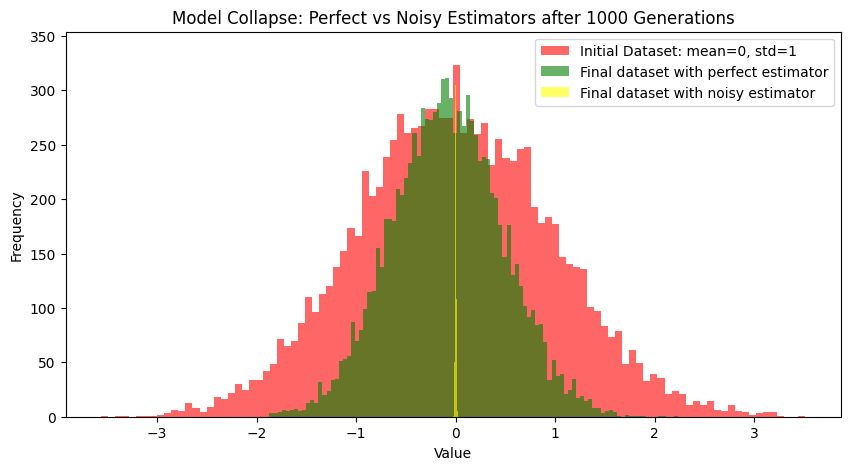

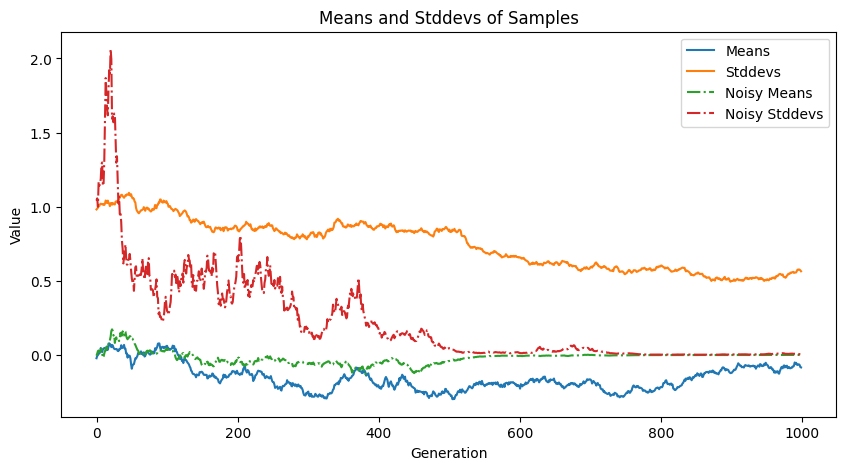

In [34]:
n = 1000
size = 10_000
means = []
stddevs = []

noisy_means = []
noisy_stddevs = []
# Random Gaussian dataset with mean 0 and stddev 1
data = np.random.normal(0, 1, size)
noisy_data = np.random.normal(0, 1, size)
# Plotting each generation of the dataset
# fig, ax = plt.subplots(5, 4, figsize=(10, 10))
# Making colors brighter for each generation
plt.figure(figsize=(10, 5))
plt.hist(data, bins=100, density=False, alpha=0.6, color='red')

for i in range(1, n):
    # Sample without replacement
    data = np.random.choice(data, size=size)
    noisy_data = np.random.choice(noisy_data, size=size)
    # Calculate the mean and stddev of the new sample
    
    mean = np.mean(data)

    mean_noisy = np.mean(noisy_data)
    noisy_estimator = np.random.normal(1, 0.1)
    mean_noisy = noisy_estimator * mean_noisy
    
    stddev = np.std(data)

    noisy_stddev = np.std(noisy_data)
    noisy_estimator = np.random.normal(1, 0.1)
    noisy_stddev = noisy_estimator * noisy_stddev
    # Generate a new dataset with the same mean and stddev
    data = np.random.normal(mean, stddev, size)
    noisy_data = np.random.normal(mean_noisy, noisy_stddev, size)

    means.append(mean)
    stddevs.append(stddev)

    noisy_means.append(mean_noisy)
    noisy_stddevs.append(noisy_stddev)

# Plotting the final dataset
plt.hist(data, bins=100, density=False, alpha=0.6, color='green')
plt.hist(noisy_data, bins=100, density=False, alpha=0.6, color='yellow')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Model Collapse: Perfect vs Noisy Estimators after {} Generations'.format(n))
plt.legend(['Initial Dataset: mean=0, std=1', f'Final dataset with perfect estimator', 
                f'Final dataset with noisy estimator'])
# Saving svg plot
plt.savefig(f'model_collapse_perfect_{n}.png')
plt.show()

# Plotting the means and stddevs
plt.figure(figsize=(10, 5))
plt.plot(means, label='Means')
plt.plot(stddevs, label='Stddevs')

plt.plot(noisy_means, label='Noisy Means', linestyle='-.')
plt.plot(noisy_stddevs, label='Noisy Stddevs', linestyle='-.')
plt.xlabel('Generation')
plt.ylabel('Value')
plt.title('Means and Stddevs of Samples')
plt.legend()
plt.savefig(f'means_stddevs_perfect_{n}.png')
plt.show()